<a href="https://colab.research.google.com/github/SAISUSHMAS-22/EverydayAI/blob/main/updated%20images%20cropping%20and%20quilt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def join_randomly(squares, output_size):
    random.shuffle(squares)
    rows = int(np.sqrt(len(squares)))
    cols = int(np.sqrt(len(squares)))
    big_square = np.zeros((output_size, output_size, 3), dtype=np.uint8)

    for i in range(rows):
        for j in range(cols):
            square = cv2.resize(squares[i * cols + j], (output_size // cols, output_size // rows), interpolation=cv2.INTER_AREA)
            big_square[i * (output_size // rows):(i + 1) * (output_size // rows), j * (output_size // cols):(j + 1) * (output_size // cols)] = square

    return big_square


In [2]:
pip install Pillow

In [3]:
pip install rembg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.9/52.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.8 MB/s eta 0:00:00


100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 118GB/s]


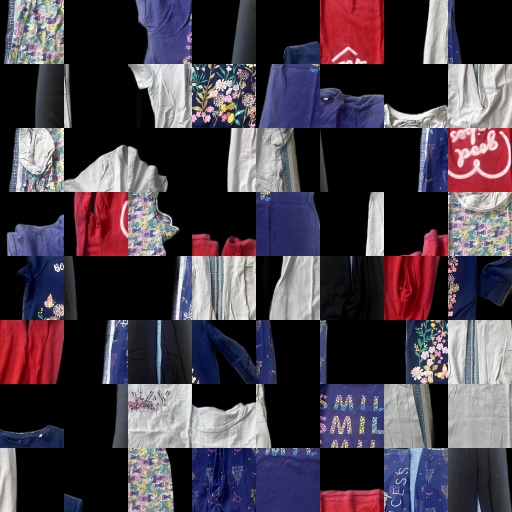

In [4]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from rembg import remove
import os
import cv2
import numpy as np
import random
from IPython.display import Image

def crop_into_squares(image, n):
    height, width = image.shape[:2]
    square_size = min(height, width) // n
    squares = []

    for i in range(n):
        for j in range(n):
            y1, y2 = i * square_size, (i + 1) * square_size
            x1, x2 = j * square_size, (j + 1) * square_size
            square = image[y1:y2, x1:x2]
            squares.append(square)

    return squares

def join_randomly(squares, output_size):
    random.shuffle(squares)
    rows = int(np.sqrt(len(squares)))
    cols = int(np.sqrt(len(squares)))
    big_square = np.zeros((output_size, output_size, 3), dtype=np.uint8)

    for i in range(rows):
        for j in range(cols):
            square = cv2.resize(squares[i * cols + j], (output_size // cols, output_size // rows), interpolation=cv2.INTER_AREA)
            big_square[i * (output_size // rows):(i + 1) * (output_size // rows), j * (output_size // cols):(j + 1) * (output_size // cols)] = square

    return big_square


# Input and output folders
input_folder = '/content/sample_data/input'
output_folder = '/content/sample_data/output'
os.makedirs(output_folder, exist_ok=True)

# Background removal and image processing
input_files = os.listdir(input_folder)
bgremoved_images = []

for input_file in input_files:
    input_path = os.path.join(input_folder, input_file)

    with open(input_path, 'rb') as i:
        input_data = i.read()
        output_data = remove(input_data)

    image_np = cv2.imdecode(np.frombuffer(output_data, np.uint8), cv2.IMREAD_COLOR)
    bgremoved_images.append(image_np)

n = 3
output_size = 512

squares = []
for image in bgremoved_images:
    cropped_squares = crop_into_squares(image, n)
    squares.extend(cropped_squares)
result_image = join_randomly(squares, output_size)
cv2.imwrite('outputt.jpg', result_image)
Image(filename="outputt.jpg")
